In [1]:
# Standard imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
import logomaker

# Insert path to mavenn beginning of path
import os
import sys
abs_path_to_mavenn = os.path.abspath('../../../')
sys.path.insert(0, abs_path_to_mavenn)

# Load mavenn
import mavenn
print(mavenn.__path__)

['/Users/jkinney/github/mavenn/mavenn']


In [2]:
# Load example data
data_df = mavenn.load_example_dataset('sortseq')

# Separate test from data_df
ix_test = data_df['set']=='test'
test_df = data_df[ix_test].reset_index(drop=True)
print(f'test N: {len(test_df):,}')

# Remove test data from data_df
data_df = data_df[~ix_test].reset_index(drop=True)
print(f'training + validation N: {len(data_df):,}')
data_df.head(10)

test N: 9,329
training + validation N: 36,449


,set,ct_0,ct_1,ct_2,ct_3,ct_4,ct_5,ct_6,ct_7,ct_8,ct_9,x
0,training,0,1,0,0,0,0,0,0,0,0,GGCTATACATTTTATGTTTCCGGGTCGTATTTTGTGTGG
1,training,0,0,0,0,0,0,0,0,1,0,GGCTTTACATTTTATGCTTCCTTCACGTATGTTGTGTCT
2,training,0,0,0,0,0,0,0,0,0,1,CGCTTTACACTTTCCGCTGCCGGCCCGTATTTTATGGGG
3,training,0,0,0,1,0,0,0,0,0,0,GGCTCTACCGTTTAGGCTTACGCCTCGAATATTGTGTGG
4,training,0,0,0,0,0,0,0,1,0,0,GGCTTTACACTTTACGCTTCCGTATCTTACGTTATGTGG
5,validation,0,0,0,0,0,0,2,0,0,0,GGATTTACACCATATGCCACCGGCTCATATGTTGTGCGG
6,validation,0,0,0,1,0,0,0,0,0,0,GGCTTTACACATCATGCTTCCGGCTCTTATGCCGTGATG
7,validation,2,0,0,0,0,0,0,0,0,0,GCCTTTAGAATTTATGTTTCCGTCACGTATGATGTGTAT
8,training,0,0,0,0,1,0,0,0,0,0,GGCTTTAAACTCTATGTTTCCGGCTCGTATGTTGTGTGG
9,training,0,0,0,1,0,0,0,0,0,0,GGCTTTCCACTTTATGCTTCCGGCTCTTATCTTGTGTGG


In [3]:
# Comptue sequence length and number of bins
L = len(data_df['x'][0])
y_cols = data_df.columns[1:-1]
Y = len(y_cols)
print(f'L={L}, Y={Y}')

L=39, Y=10


In [4]:
# Get sequence length
L = len(data_df['x'][0])

# Define model
model = mavenn.Model(regression_type='MPA',
                     L=L,
                     Y=Y,
                     alphabet='dna',
                     gpmap_type='blackbox',
                     gpmap_kwargs={
                         'hidden_layer_sizes': [5]*5
                     })

# Set training data
model.set_data(x=data_df['x'],
               y=data_df[y_cols],
               validation_flags=(data_df['set']=='validation'),
               shuffle=True)

# Fit model to data
history = model.fit(learning_rate=.0003,
                    epochs=1000,
                    batch_size=100,
                    early_stopping=True, 
                    early_stopping_patience=10,
                    linear_initialization=False)

N = 36,449 observations set as training data.
Using 24.8% for validation.
Data shuffled.
Time to set data: 0.594 sec.
Epoch 1/1000
275/275 [==============================] - 1s 3ms/step - loss: 355.6193 - I_like: -7.7461e-04 - val_loss: 350.0281 - val_I_like: 0.0029
Epoch 2/1000
275/275 [==============================] - 1s 3ms/step - loss: 341.5405 - I_like: 0.0690 - val_loss: 327.4938 - val_I_like: 0.1766
Epoch 3/1000
275/275 [==============================] - 1s 2ms/step - loss: 319.4056 - I_like: 0.2452 - val_loss: 311.9012 - val_I_like: 0.2873
Epoch 4/1000
275/275 [==============================] - 1s 2ms/step - loss: 309.3336 - I_like: 0.2978 - val_loss: 304.7409 - val_I_like: 0.3121
Epoch 5/1000
275/275 [==============================] - 1s 2ms/step - loss: 303.4446 - I_like: 0.3118 - val_loss: 299.6016 - val_I_like: 0.3230
Epoch 6/1000
275/275 [==============================] - 1s 3ms/step - loss: 299.0360 - I_like: 0.3193 - val_loss: 295.7226 - val_I_like: 0.3276
Epoch 7/1000


Epoch 57/1000
275/275 [==============================] - 1s 2ms/step - loss: 277.5497 - I_like: 0.3709 - val_loss: 277.6255 - val_I_like: 0.3622
Epoch 58/1000
275/275 [==============================] - 1s 2ms/step - loss: 277.5841 - I_like: 0.3709 - val_loss: 277.9566 - val_I_like: 0.3588
Epoch 59/1000
275/275 [==============================] - 1s 2ms/step - loss: 277.5559 - I_like: 0.3707 - val_loss: 277.7392 - val_I_like: 0.3607
Epoch 60/1000
275/275 [==============================] - 1s 3ms/step - loss: 277.6332 - I_like: 0.3703 - val_loss: 277.9964 - val_I_like: 0.3578
Epoch 61/1000
275/275 [==============================] - 1s 4ms/step - loss: 277.4627 - I_like: 0.3720 - val_loss: 277.5972 - val_I_like: 0.3617
Epoch 62/1000
275/275 [==============================] - 1s 4ms/step - loss: 277.3423 - I_like: 0.3732 - val_loss: 277.9844 - val_I_like: 0.3564
Epoch 63/1000
275/275 [==============================] - 1s 3ms/step - loss: 277.4776 - I_like: 0.3707 - val_loss: 277.4048 - val_

275/275 [==============================] - 1s 2ms/step - loss: 276.3236 - I_like: 0.3771 - val_loss: 276.8984 - val_I_like: 0.3621
Epoch 114/1000
275/275 [==============================] - 1s 2ms/step - loss: 276.3469 - I_like: 0.3761 - val_loss: 276.3769 - val_I_like: 0.3682
Epoch 115/1000
275/275 [==============================] - 1s 2ms/step - loss: 276.2690 - I_like: 0.3779 - val_loss: 276.5100 - val_I_like: 0.3663
Epoch 116/1000
275/275 [==============================] - 1s 2ms/step - loss: 276.2156 - I_like: 0.3782 - val_loss: 276.4999 - val_I_like: 0.3670
Epoch 117/1000
275/275 [==============================] - 1s 2ms/step - loss: 276.2059 - I_like: 0.3784 - val_loss: 276.9436 - val_I_like: 0.3615
Epoch 118/1000
275/275 [==============================] - 1s 2ms/step - loss: 276.2431 - I_like: 0.3772 - val_loss: 276.5760 - val_I_like: 0.3665
Epoch 119/1000
275/275 [==============================] - 1s 2ms/step - loss: 276.3188 - I_like: 0.3766 - val_loss: 276.5620 - val_I_like: 

In [5]:
# Save model
model.save('sortseq_mpa_blackbox')

Model saved to these files:
	sortseq_mpa_blackbox.pickle
	sortseq_mpa_blackbox.h5


In [6]:
# Load model
model = mavenn.load('sortseq_mpa_blackbox')

Model loaded from these files:
	sortseq_mpa_blackbox.pickle
	sortseq_mpa_blackbox.h5


On test data:
I_like_test: 0.334 +- 0.008 bits
I_pred_test: 0.539 +- 0.011 bits


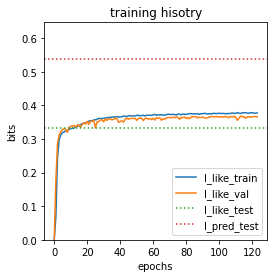

In [7]:
# Show training history
print('On test data:')
x_test = test_df['x'].values
y_test = test_df[y_cols].values

# Compute likelihood information
I_like, dI_like =  model.I_likelihood(x=x_test, y=y_test)
print(f'I_like_test: {I_like:.3f} +- {dI_like:.3f} bits') 

# Compute predictive information
I_pred, dI_pred = model.I_predictive(x=x_test, y=y_test)
print(f'I_pred_test: {I_pred:.3f} +- {dI_pred:.3f} bits')

I_like_hist = model.history['I_like']
val_I_like_hist = model.history['val_I_like']

fig, ax = plt.subplots(1,1,figsize=[4,4])
ax.plot(I_like_hist, label='I_like_train')
ax.plot(val_I_like_hist, label='I_like_val')
ax.axhline(I_like, color='C2', linestyle=':', label='I_like_test')
ax.axhline(I_pred, color='C3', linestyle=':', label='I_pred_test')
ax.legend()
ax.set_xlabel('epochs')
ax.set_ylabel('bits')
ax.set_title('training hisotry')
ax.set_ylim([0, I_pred*1.2]);

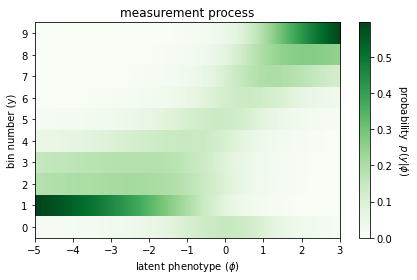

In [8]:
# Get G-P map parameters in matrix form
theta = model.get_theta(gauge='uniform')

# Create grid in phi space
phi_lim = [-5, 3]
phi_grid = np.linspace(phi_lim[0], phi_lim[1], 1000)

# Create array of allowable y values
Y = model.model.Y    # Y = number of bins
y_lim = [-.5, Y-.5]
y_all = range(Y)

# Compute matrix of p(y|phi) values
measurement_process = model.p_of_y_given_phi(y_all, phi_grid)

# Create figure with two panels
fig, ax = plt.subplots(1,1,figsize=[6,4])

im = ax.imshow(measurement_process,
               cmap='Greens',
               extent=phi_lim+y_lim,
               vmin=0,
               origin='lower',
               interpolation='nearest',
               aspect="auto")
ax.set_yticks(y_all)
ax.set_ylabel('bin number (y)')
ax.set_xlabel('latent phenotype ($\phi$)')
ax.set_title('measurement process')
cb = plt.colorbar(im)
cb.set_label('probability  $p(y|\phi)$', rotation=-90, va="bottom")

# Fix up plot
fig.tight_layout(w_pad=3)
fig.savefig('sortseq_mpa_visualization.png')
plt.show()

In [9]:
# Test simulate_data
sim_df = model.simulate_dataset(N=1000)
sim_df.head()

,set,phi,ct_0,ct_1,ct_2,ct_3,ct_4,ct_5,ct_6,ct_7,ct_8,ct_9,x
0,test,-1.355081,0,0,0,0,1,0,0,0,0,0,GGCTTTACACTTTATTCTTCCGGCTCGTTTGTTGTGTGG
1,test,1.460136,0,0,0,0,0,0,0,0,1,0,GGCTGTACACTTTATGCTTCCGGCTCGTATATTATGTGG
2,validation,1.957141,0,0,0,0,0,0,0,1,0,0,GGCTTTACACTTTATGCTTCCGGCTTGTATATTGTGTTT
3,test,-0.948532,0,1,0,0,0,0,0,0,0,0,GGCTCTACACTTTACGCTTCCGGCTCGTATGTTGTGTGG
4,training,1.085658,0,0,0,0,0,0,0,0,1,0,GGCTTTACAGTTTATGCTTCCAGCTCGTATGTTGTCTGT
